# ATOC NWP: evaluating model resolutions

September 14, 2021
Jay.Kong@colorado.edu

# 1.0 Load your data


This notebook assumes that your data is located in GEOGRID_DIR. This code uses xarray instead of wrf python.

In [2]:
# Make sure the environment is good ** especially important if running on another machines
import numpy
import cartopy
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import matplotlib.style as style
import os

from netCDF4 import Dataset
from xarray import DataArray

print("Done importing modules")

Done importing modules


In [5]:
########## Edit this to point to your directory
GEOGRID_DIRECTORY = "/pl/active/WRFLES_GAD/ATOC_NWP/students/jlundqui/ICA_04/"
# GEOGRID_DIRECTORY = "/projects/jlundqui/ICA_04/"

# Open all your geogrid files
lambert4040 = xr.open_dataset(GEOGRID_DIRECTORY+"lambert4040/geo_em.d01.nc")
lambert3060 = xr.open_dataset(GEOGRID_DIRECTORY+"lambert3060/geo_em.d01.nc")
mercator = xr.open_dataset(GEOGRID_DIRECTORY+"mercator/geo_em.d01.nc")
polar = xr.open_dataset(GEOGRID_DIRECTORY+"polar/geo_em.d01.nc")

print(polar)

<xarray.Dataset>
Dimensions:     (Time: 1, land_cat: 21, month: 12, soil_cat: 16, south_north: 399, south_north_stag: 400, west_east: 399, west_east_stag: 400)
Dimensions without coordinates: Time, land_cat, month, soil_cat, south_north, south_north_stag, west_east, west_east_stag
Data variables: (12/52)
    Times       (Time) |S19 ...
    XLAT_M      (Time, south_north, west_east) float32 ...
    XLONG_M     (Time, south_north, west_east) float32 ...
    XLAT_V      (Time, south_north_stag, west_east) float32 ...
    XLONG_V     (Time, south_north_stag, west_east) float32 ...
    XLAT_U      (Time, south_north, west_east_stag) float32 ...
    ...          ...
    OA4         (Time, south_north, west_east) float32 ...
    OL1         (Time, south_north, west_east) float32 ...
    OL2         (Time, south_north, west_east) float32 ...
    OL3         (Time, south_north, west_east) float32 ...
    OL4         (Time, south_north, west_east) float32 ...
    VAR_SSO     (Time, south_north, 

# 2.0 Check the max/min MAPFAC_M (compare to Tuesday numbers)


Let's verify the maximum and minimum values that you found with the NCO commands on Tuesday. Note that we could do this more elegantly using the attribute MAP_PROJ, but we'll just do it by hand now. 

In [6]:
print('Lambert4040:')
print(np.max(lambert4040['MAPFAC_M'].values[0, :, :]),np.min(lambert4040['MAPFAC_M'].values[0, :, :]))
#print(np.max(lambert4040['XLAT_M'].values[0, :, :]),np.min(lambert4040['XLAT_M'].values[0, :, :]))

print('Lambert3060:')
print(np.max(lambert3060['MAPFAC_M'].values[0, :, :]),np.min(lambert3060['MAPFAC_M'].values[0, :, :]))

print('Polar:')
print(np.max(polar['MAPFAC_M'].values[0, :, :]),np.min(polar['MAPFAC_M'].values[0, :, :]))

print('Mercator:')
print(np.max(mercator['MAPFAC_M'].values[0, :, :]),np.min(mercator['MAPFAC_M'].values[0, :, :]))

Lambert4040:
1.0083015 0.9999999
Lambert3060:
0.99079096 0.9656477
Polar:
1.0679243 0.9464118
Mercator:
1.1188397 0.90812504


# 3.0 Contour plots of MAPFAC_M of the four projections


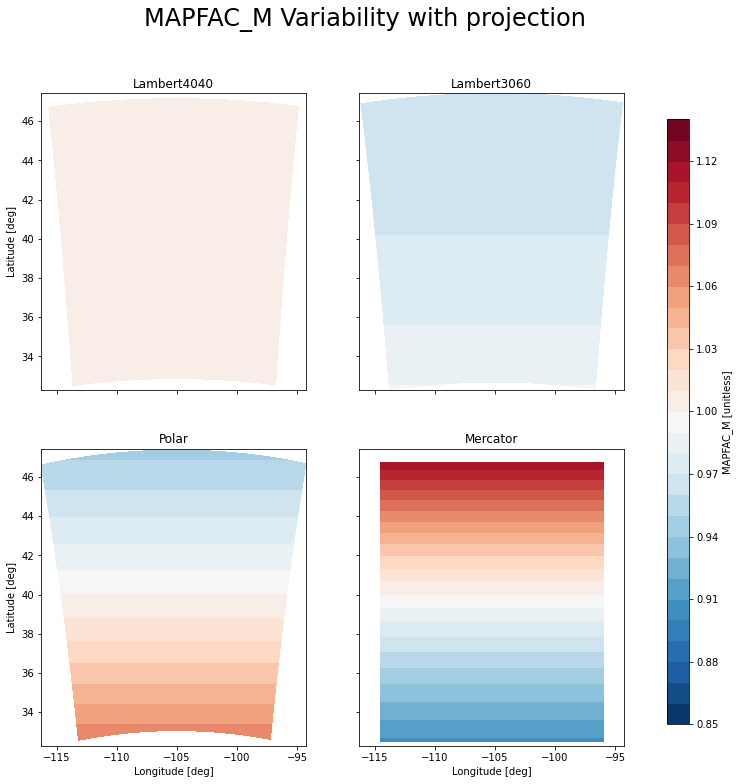

In [8]:
fig, ax = plt.subplots(2,2,figsize=(12,12), sharex=True, sharey=True)
# c_levels = np.linspace(0.6,1.4,0.05)
c_levels = numpy.arange(0.85, 1.15, 0.01)
                                                                 
im = ax[0,0].contourf(lambert4040['XLONG_M'].values[0, :, :],
    lambert4040['XLAT_M'].values[0, :, :],
    lambert4040['MAPFAC_M'].values[0, :, :], c_levels,
    cmap=plt.cm.RdBu_r)
ax[0,1].contourf(lambert3060['XLONG_M'].values[0, :, :],
    lambert3060['XLAT_M'].values[0, :, :],
    lambert3060['MAPFAC_M'].values[0, :, :], c_levels,
    cmap=plt.cm.RdBu_r)
ax[1,0].contourf(polar['XLONG_M'].values[0, :, :],
    polar['XLAT_M'].values[0, :, :],
    polar['MAPFAC_M'].values[0, :, :], c_levels,
    cmap=plt.cm.RdBu_r)
ax[1,1].contourf(mercator['XLONG_M'].values[0, :, :],
    mercator['XLAT_M'].values[0, :, :],
    mercator['MAPFAC_M'].values[0, :, :], c_levels,
    cmap=plt.cm.RdBu_r)

plt.suptitle("MAPFAC_M Variability with projection", fontsize=24)

ax[0,0].set_ylabel("Latitude [deg]")
ax[1,0].set_ylabel("Latitude [deg]")
ax[1,0].set_xlabel("Longitude [deg]")
ax[1,1].set_xlabel("Longitude [deg]")

ax[0,0].set_title("Lambert4040")
ax[0,1].set_title("Lambert3060")
ax[1,0].set_title("Polar")
ax[1,1].set_title("Mercator")

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.025, 0.7])
                                                                 
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("MAPFAC_M [unitless]")

plt.show()

# 4.0 Contour plots of terrain height of the four projections

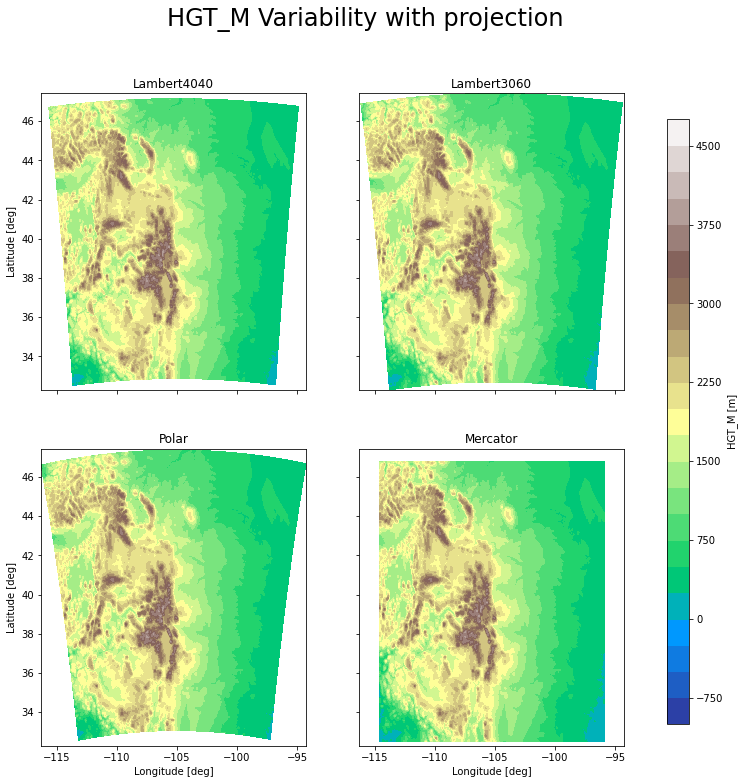

In [9]:

fig, ax = plt.subplots(2,2,figsize=(12,12), sharex=True, sharey=True)
c_levels = numpy.arange(-1000, 5000, 250)
                                                                 
im = ax[0,0].contourf(lambert4040['XLONG_M'].values[0, :, :],
    lambert4040['XLAT_M'].values[0, :, :],
    lambert4040['HGT_M'].values[0, :, :], c_levels,
    cmap=plt.cm.terrain)
ax[0,1].contourf(lambert3060['XLONG_M'].values[0, :, :],
    lambert3060['XLAT_M'].values[0, :, :],
    lambert3060['HGT_M'].values[0, :, :], c_levels,
    cmap=plt.cm.terrain)
ax[1,0].contourf(polar['XLONG_M'].values[0, :, :],
    polar['XLAT_M'].values[0, :, :],
    polar['HGT_M'].values[0, :, :], c_levels,
    cmap=plt.cm.terrain)
ax[1,1].contourf(mercator['XLONG_M'].values[0, :, :],
    mercator['XLAT_M'].values[0, :, :],
    mercator['HGT_M'].values[0, :, :], c_levels,
    cmap=plt.cm.terrain)

plt.suptitle("HGT_M Variability with projection", fontsize=24)

ax[0,0].set_ylabel("Latitude [deg]")
ax[1,0].set_ylabel("Latitude [deg]")
ax[1,0].set_xlabel("Longitude [deg]")
ax[1,1].set_xlabel("Longitude [deg]")

ax[0,0].set_title("Lambert4040")
ax[0,1].set_title("Lambert3060")
ax[1,0].set_title("Polar")
ax[1,1].set_title("Mercator")

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.025, 0.7])
                                                                 
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("HGT_M [m]")

plt.show()

# 5.0 Contour plots of terrain height of different resolutions


Remember to change the directories for the directories that you used. Also, to see the differences between the resolutions more clearly, consider changing the axes ranges.

In [10]:
dx4km_nx400 = xr.open_dataset(GEOGRID_DIRECTORY+"lambert4040/geo_em.d01.nc")
dx16km_nx100 = xr.open_dataset(GEOGRID_DIRECTORY+"dx16km_nx100/geo_em.d01.nc")

# here you should add other tests of geog_data_res 
dx32km_nx50 = xr.open_dataset(GEOGRID_DIRECTORY+"dx32km_nx50/geo_em.d01.nc")
dx2km_nx800 = xr.open_dataset(GEOGRID_DIRECTORY+"dx2km_nx800/geo_em.d01.nc")
dx1km_nx1600 = xr.open_dataset(GEOGRID_DIRECTORY+"dx1km_nx1600/geo_em.d01.nc")

32km:
3411.7222 166.5244


In [12]:
print('32km:',np.max(dx32km_nx50['HGT_M'].values[0, :, :]))

print('16km:',np.max(dx16km_nx100['HGT_M'].values[0, :, :]))

print('4km:',np.max(lambert4040['HGT_M'].values[0, :, :]))

print('2km:',np.max(dx2km_nx800['HGT_M'].values[0, :, :]))

print('1km:',np.max(dx1km_nx1600['HGT_M'].values[0, :, :]))

32km: 3411.7222
16km: 3610.213
4km: 3827.3018
2km: 4018.2183
1km: 4128.2344


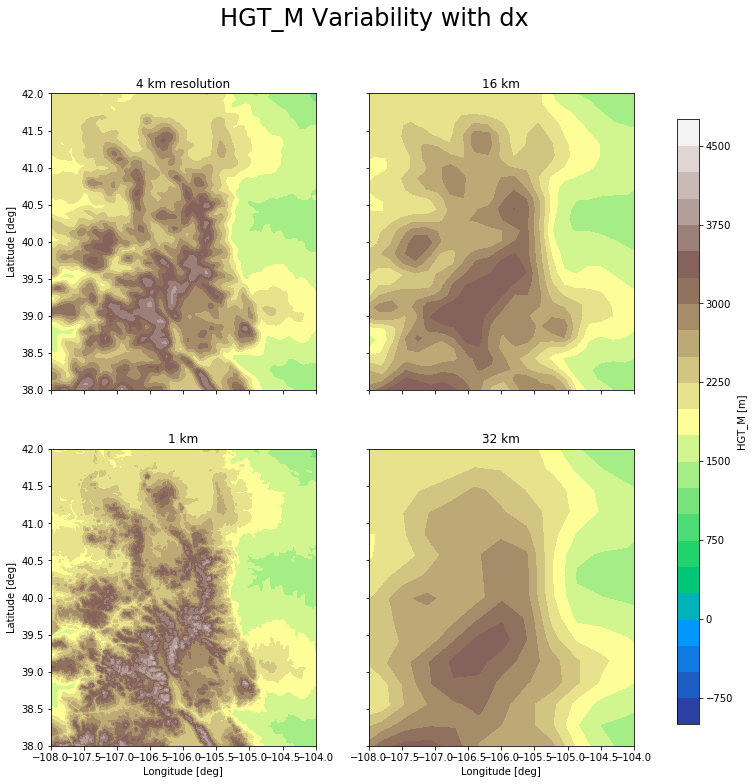

In [8]:
# Make a plot

fig, ax = plt.subplots(2,2,figsize=(12,12), sharex=True, sharey=True)
c_levels = numpy.arange(-1000, 5000, 250)
                                                                 
im = ax[0,0].contourf(dx4km_nx400['XLONG_M'].values[0, :, :],
    dx4km_nx400['XLAT_M'].values[0, :, :],
    dx4km_nx400['HGT_M'].values[0, :, :], c_levels,
    cmap=plt.cm.terrain)
ax[0,0].set_title("4 km resolution")

ax[0,1].contourf(dx16km_nx100['XLONG_M'].values[0, :, :],
    dx16km_nx100['XLAT_M'].values[0, :, :],
    dx16km_nx100['HGT_M'].values[0, :, :], c_levels,
    cmap=plt.cm.terrain)
ax[0,1].set_title("16 km")


######### Change these lines to point to other geog_data_res tests
ax[1,0].contourf(dx1km_nx1600['XLONG_M'].values[0, :, :],
    dx1km_nx1600['XLAT_M'].values[0, :, :],
    dx1km_nx1600['HGT_M'].values[0, :, :], c_levels,
    cmap=plt.cm.terrain)
ax[1,0].set_title("1 km")

ax[1,1].contourf(dx32km_nx50['XLONG_M'].values[0, :, :],
    dx32km_nx50['XLAT_M'].values[0, :, :],
    dx32km_nx50['HGT_M'].values[0, :, :], c_levels,
    cmap=plt.cm.terrain)
ax[1,1].set_title("32 km")

plt.suptitle("HGT_M Variability with dx", fontsize=24)


############ Change the extent of the maps
ax[0,0].set_ylim(38,42)
ax[0,0].set_xlim(-108,-104)

ax[0,0].set_ylabel("Latitude [deg]")
ax[1,0].set_ylabel("Latitude [deg]")
ax[1,0].set_xlabel("Longitude [deg]")
ax[1,1].set_xlabel("Longitude [deg]")


fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.025, 0.7])
                                                                 
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("HGT_M [m]")

plt.show()

Choose a lat/long location and think about how its elevation changes as it's averaged with a larger and larger surrounding area...

In [72]:
# Mount Elbert (39.1178, -106.4454)
desired_lat = 39.1178
desired_lon = -106.4454

#Mount Massive (39.1875, -106.4757)
#desired_lat = 39.1875
#desired_lon = -106.4757

km_lon = 85 #at 40 deg N, 85 km per degree of longitude -- should really use a projection here
km_lat = 111 # 111 km per degree of latitude

lon_1km = dx1km_nx1600['XLONG_M'].values[0, :, :]
lat_1km = dx1km_nx1600['XLAT_M'].values[0, :, :]
hgt_1km = dx1km_nx1600['HGT_M'].values[0, :, :]
xdist_1km = np.sqrt(np.square(abs(km_lon*(lon_1km - desired_lon))) 
                    + np.square(abs(km_lat*(lat_1km - desired_lat))))
#print(np.min(xdist_1km),np.max(xdist_1km))
ind_1km = np.unravel_index(np.argmin(xdist_1km, axis=None), xdist_1km.shape)
print("1-km location:",lat_1km[ind_1km],lon_1km[ind_1km],hgt_1km[ind_1km])

lon_2km = dx2km_nx800['XLONG_M'].values[0, :, :]
lat_2km = dx2km_nx800['XLAT_M'].values[0, :, :]
hgt_2km = dx2km_nx800['HGT_M'].values[0, :, :]
xdist_2km = np.sqrt(np.square(abs(km_lon*(lon_2km - desired_lon))) 
                    + np.square(abs(km_lat*(lat_2km - desired_lat))))
#print(np.min(xdist_2km),np.max(xdist_2km))
ind_2km = np.unravel_index(np.argmin(xdist_2km, axis=None), xdist_2km.shape)
print("2-km location:",lat_2km[ind_2km],lon_2km[ind_2km],hgt_2km[ind_2km])

lon_4km = dx4km_nx400['XLONG_M'].values[0, :, :]
lat_4km = dx4km_nx400['XLAT_M'].values[0, :, :]
hgt_4km = dx4km_nx400['HGT_M'].values[0, :, :]
xdist_4km = np.sqrt(np.square(abs(km_lon*(lon_4km - desired_lon))) 
                    + np.square(abs(km_lat*(lat_4km - desired_lat))))
#print(np.min(xdist_2km),np.max(xdist_2km))
ind_4km = np.unravel_index(np.argmin(xdist_4km, axis=None), xdist_4km.shape)
print("4-km location:",lat_4km[ind_4km],lon_4km[ind_4km],hgt_4km[ind_4km])

lon_16km = dx16km_nx100['XLONG_M'].values[0, :, :]
lat_16km = dx16km_nx100['XLAT_M'].values[0, :, :]
hgt_16km = dx16km_nx100['HGT_M'].values[0, :, :]
xdist_16km = np.sqrt(np.square(abs(km_lon*(lon_16km - desired_lon))) 
                    + np.square(abs(km_lat*(lat_16km - desired_lat))))
#print(np.min(xdist_2km),np.max(xdist_2km))
ind_16km = np.unravel_index(np.argmin(xdist_16km, axis=None), xdist_16km.shape)
print("16-km location:",lat_16km[ind_16km],lon_16km[ind_16km],hgt_16km[ind_16km])

lon_32km = dx32km_nx50['XLONG_M'].values[0, :, :]
lat_32km = dx32km_nx50['XLAT_M'].values[0, :, :]
hgt_32km = dx32km_nx50['HGT_M'].values[0, :, :]
xdist_32km = np.sqrt(np.square(abs(km_lon*(lon_32km - desired_lon))) 
                    + np.square(abs(km_lat*(lat_32km - desired_lat))))
#print(np.min(xdist_2km),np.max(xdist_2km))
ind_32km = np.unravel_index(np.argmin(xdist_32km, axis=None), xdist_32km.shape)
print("32-km location:",lat_32km[ind_32km],lon_32km[ind_32km],hgt_32km[ind_32km])

1-km location: 39.11975 -106.442566 4082.104
2-km location: 39.11975 -106.442566 3994.0674
4-km location: 39.10177 -106.442184 3599.2632
16-km location: 39.13654 -106.535675 3458.5908
32-km location: 39.13887 -106.35019 3325.2715
